#### If you already ran the "preparing data", you can skip this section.

# Preparing the data

In [1]:
import modules.import_data as import_data
import modules.prepare_data as prepare_data
import modules.natural_language_treatment as nlt

In [2]:
dfTranscripts = import_data.import_transcripts(6000)

In [3]:
print("Number of transcripts:", len(dfTranscripts))
dfTranscripts.head()

Number of transcripts: 81822


,serie,season,nb_episode,name_episode,transcript,path
0,Lost,01,1,Pilot_(1),"1\n00:02:50,904 --> 00:02:52,929\nHelp me!\n\n...",data/transcripts/1___Lost/01/01__Pilot_(1).txt
1,Lost,01,2,Pilot_(2),"1\n00:00:18,752 --> 00:00:20,310\nAnything?\n\...",data/transcripts/1___Lost/01/02__Pilot_(2).txt
2,Lost,01,3,Tabula_rasa,"1\n00:00:02,002 --> 00:00:03,663\n<i>Previousl...",data/transcripts/1___Lost/01/03__Tabula_rasa.txt
3,Lost,01,4,Walkabout,"1\n00:00:36,469 --> 00:00:38,903\nHelp me!\n\n...",data/transcripts/1___Lost/01/04__Walkabout.txt
4,Lost,01,5,White_rabbit,"1\n00:00:10,176 --> 00:00:11,666\nStay down.\n...",data/transcripts/1___Lost/01/05__White_rabbit.txt


## Visualizing part of transcript

In [9]:
dfTranscripts.iloc[0]["transcript"][:100]

'1\n00:02:50,904 --> 00:02:52,929\nHelp me!\n\n2\n00:02:53,006 --> 00:02:55,406\nSomebody, help me out.\n\n3\n'

## Trying function to remove timecodes and numbers

In [10]:
new_transcript, count_removed_timecodes, count_removed_numbers = prepare_data.remove_timecodes_and_number(dfTranscripts.iloc[0]["transcript"])
print("Removed", count_removed_timecodes, "timecodes and", count_removed_numbers, "numbers")
new_transcript[:100]

Removed 291 timecodes and 0 numbers


'1\n\nHelp me!\n\n2\n\nSomebody, help me out.\n\n3\n\nSomebody, help me over here!\n\n4\n\nSomebody, help me out!\n\n'

In [11]:
new_transcript,count_removed_newline = prepare_data.remove_newline(new_transcript)
new_transcript[:300]

'1  Help me!  2  Somebody, help me out.  3  Somebody, help me over here!  4  Somebody, help me out!  5  Oh, my God!  6  Walt! Walt!  7  - Stay away from the gas! Stay there!  8  Help! Help!  9  Somebody, help me!  10  Oh, my leg!  11  Hey, get over here. Give me a hand.  12  You, come on! Come over h'

In [12]:
new_transcript, count_removed_punctuation = prepare_data.remove_punctuation(new_transcript)
new_transcript[:300]

'1  Help me   2  Somebody  help me out   3  Somebody  help me over here   4  Somebody  help me out   5  Oh  my God   6  Walt  Walt   7    Stay away from the gas  Stay there   8  Help  Help   9  Somebody  help me   10  Oh  my leg   11  Hey  get over here  Give me a hand   12  You  come on  Come over h'

In [13]:
new_transcript, count_removed_multiple_spaces = prepare_data.remove_multiple_spaces(new_transcript)
print("Removed", count_removed_multiple_spaces, "spaces")
new_transcript[:300]

Removed 837 spaces


'1 Help me 2 Somebody help me out 3 Somebody help me over here 4 Somebody help me out 5 Oh my God 6 Walt Walt 7 Stay away from the gas Stay there 8 Help Help 9 Somebody help me 10 Oh my leg 11 Hey get over here Give me a hand 12 You come on Come over here Give me a hand 13 On the count of three 14 On'

In [14]:
new_transcript = prepare_data.convert_to_lowercase(new_transcript)

## Prepare all the data for tokenization

In [2]:
dfTranscriptsTokenization =  prepare_data.prepare_data_in_dataframe(dfTranscripts)
dfTranscriptsTokenization

NameError: name 'dfTranscripts' is not defined

In [16]:
dfTranscriptsTokenization = dfTranscriptsTokenization.drop('transcript', axis=1)
dfTranscriptsTokenization.to_csv("data/pandas_export/prepared_for_tokenization.csv", sep=";", escapechar="\\")

# Import Data from CSV

In [3]:
import pandas as pd
dfTranscriptsTokenizationAll = pd.read_csv('data/pandas_export/prepared_for_tokenization.csv', sep=";", escapechar="\\")

In [4]:
dfTranscriptsTokenization = dfTranscriptsTokenizationAll[:2000]

In [5]:
dfTranscriptsTokenization

,Unnamed: 0,serie,season,nb_episode,name_episode,path,transcripts_prepared_for_tokenization
0,0,Lost,1,1,Pilot_(1),data/transcripts/1___Lost/01/01__Pilot_(1).txt,help me somebody help me out somebody help ...
1,1,Lost,1,2,Pilot_(2),data/transcripts/1___Lost/01/02__Pilot_(2).txt,anything you keep asking if there s anything...
2,2,Lost,1,3,Tabula_rasa,data/transcripts/1___Lost/01/03__Tabula_rasa.txt,i previously on lost i do you think he s gon...
3,3,Lost,1,4,Walkabout,data/transcripts/1___Lost/01/04__Walkabout.txt,help me walt you gotta keep that dog quiet ...
4,4,Lost,1,5,White_rabbit,data/transcripts/1___Lost/01/05__White_rabbit.txt,stay down your choice man walk away now you ...
...,...,...,...,...,...,...,...
1995,1995,Criminal_Minds,7,24,Run,data/transcripts/21___Criminal_Minds/07/24__Ru...,alarm beeping groans i have one minute who...
1996,1996,Criminal_Minds,8,1,The_Silencer,data/transcripts/21___Criminal_Minds/08/01__Th...,man jake thunder take it easy take it easy ...
1997,1997,Criminal_Minds,8,2,The_Pact,data/transcripts/21___Criminal_Minds/08/02__Th...,you gotta be kidding me i can t take you we...
1998,1998,Criminal_Minds,8,3,Through_the_Looking_Glass,data/transcripts/21___Criminal_Minds/08/03__Th...,i can t do these late nights anymore my girl...


## NLTK

In [6]:
import nltk
from nltk.tokenize import word_tokenize

In [7]:
dfTranscriptsTokenized = nlt.tokenization(dfTranscriptsTokenization)
dfTranscriptsTokenized = dfTranscriptsTokenized.drop('transcripts_prepared_for_tokenization', axis=1)
dfTranscriptsTokenized

/Users/baptiste/Documents/github/courses/movies-recommendation-and-subtitles-analysis/modules/natural_language_treatment.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transcripts_prepared_for_tokenization"] = df["transcripts_prepared_for_tokenization"].astype(str)
/Users/baptiste/Documents/github/courses/movies-recommendation-and-subtitles-analysis/modules/natural_language_treatment.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transcript_tokenized"] = df["transcripts_prepared_for_toke

,Unnamed: 0,serie,season,nb_episode,name_episode,path,transcript_tokenized
0,0,Lost,1,1,Pilot_(1),data/transcripts/1___Lost/01/01__Pilot_(1).txt,"[help, me, somebody, help, me, out, somebody, ..."
1,1,Lost,1,2,Pilot_(2),data/transcripts/1___Lost/01/02__Pilot_(2).txt,"[anything, you, keep, asking, if, there, s, an..."
2,2,Lost,1,3,Tabula_rasa,data/transcripts/1___Lost/01/03__Tabula_rasa.txt,"[i, previously, on, lost, i, do, you, think, h..."
3,3,Lost,1,4,Walkabout,data/transcripts/1___Lost/01/04__Walkabout.txt,"[help, me, walt, you, got, ta, keep, that, dog..."
4,4,Lost,1,5,White_rabbit,data/transcripts/1___Lost/01/05__White_rabbit.txt,"[stay, down, your, choice, man, walk, away, no..."
...,...,...,...,...,...,...,...
1995,1995,Criminal_Minds,7,24,Run,data/transcripts/21___Criminal_Minds/07/24__Ru...,"[alarm, beeping, groans, i, have, one, minute,..."
1996,1996,Criminal_Minds,8,1,The_Silencer,data/transcripts/21___Criminal_Minds/08/01__Th...,"[man, jake, thunder, take, it, easy, take, it,..."
1997,1997,Criminal_Minds,8,2,The_Pact,data/transcripts/21___Criminal_Minds/08/02__Th...,"[you, got, ta, be, kidding, me, i, can, t, tak..."
1998,1998,Criminal_Minds,8,3,Through_the_Looking_Glass,data/transcripts/21___Criminal_Minds/08/03__Th...,"[i, can, t, do, these, late, nights, anymore, ..."


In [8]:
dfTranscriptsLemanized = nlt.lemanization(dfTranscriptsTokenized)
dfTranscriptsLemanized = dfTranscriptsTokenized.drop('transcripts_prepared_for_tokenization', axis=1)


KeyError: "['transcripts_prepared_for_tokenization'] not found in axis"

In [10]:
dfOccurenceSerie = nlt.get_occurence_from_df_serie(dfTranscriptsLemanized)
dfTranscriptsLemanizedWithOcc = nlt.get_occurence_from_df_ep(dfTranscriptsLemanized)
dfTranscriptsLemanizedWithOcc

,Unnamed: 0,serie,season,nb_episode,name_episode,path,transcript_tokenized,transcript_lemanized,occurence_ep
0,0,Lost,1,1,Pilot_(1),data/transcripts/1___Lost/01/01__Pilot_(1).txt,"[help, me, somebody, help, me, out, somebody, ...","[aid, Maine, person, aid, Maine, out, person, ...","{'aid': 21, 'Maine': 36, 'person': 4, 'out': 1..."
1,1,Lost,1,2,Pilot_(2),data/transcripts/1___Lost/01/02__Pilot_(2).txt,"[anything, you, keep, asking, if, there, s, an...","[anything, you, support, ask, if, there, secon...","{'anything': 8, 'you': 116, 'support': 3, 'ask..."
2,2,Lost,1,3,Tabula_rasa,data/transcripts/1___Lost/01/03__Tabula_rasa.txt,"[i, previously, on, lost, i, do, you, think, h...","[iodine, previously, on, lose, iodine, bash, y...","{'iodine': 175, 'previously': 1, 'on': 20, 'lo..."
3,3,Lost,1,4,Walkabout,data/transcripts/1___Lost/01/04__Walkabout.txt,"[help, me, walt, you, got, ta, keep, that, dog...","[aid, Maine, walt, you, get, tantalum, support...","{'aid': 6, 'Maine': 53, 'walt': 2, 'you': 150,..."
4,4,Lost,1,5,White_rabbit,data/transcripts/1___Lost/01/05__White_rabbit.txt,"[stay, down, your, choice, man, walk, away, no...","[stay, down, your, choice, man, walk, away, no...","{'stay': 3, 'down': 4, 'your': 16, 'choice': 1..."
...,...,...,...,...,...,...,...,...,...
1995,1995,Criminal_Minds,7,24,Run,data/transcripts/21___Criminal_Minds/07/24__Ru...,"[alarm, beeping, groans, i, have, one, minute,...","[alarm, beep, groan, iodine, rich_person, one,...","{'alarm': 4, 'beep': 4, 'groan': 5, 'iodine': ..."
1996,1996,Criminal_Minds,8,1,The_Silencer,data/transcripts/21___Criminal_Minds/08/01__Th...,"[man, jake, thunder, take, it, easy, take, it,...","[man, jake, boom, return, information_technolo...","{'man': 3, 'jake': 1, 'boom': 1, 'return': 8, ..."
1997,1997,Criminal_Minds,8,2,The_Pact,data/transcripts/21___Criminal_Minds/08/02__Th...,"[you, got, ta, be, kidding, me, i, can, t, tak...","[you, get, tantalum, beryllium, kid, Maine, io...","{'you': 134, 'get': 48, 'tantalum': 3, 'beryll..."
1998,1998,Criminal_Minds,8,3,Through_the_Looking_Glass,data/transcripts/21___Criminal_Minds/08/03__Th...,"[i, can, t, do, these, late, nights, anymore, ...","[iodine, can, thymine, bash, these, late, nigh...","{'iodine': 146, 'can': 29, 'thymine': 67, 'bas..."


In [11]:
dfOccurenceSerie

,Lost,Heroes,Jericho_(2006),Prison_Break,Supernatural,Dexter,24,Smallville,The_Dresden_Files,Doctor_Who,Carnivale,Oz,House,Desperate_Housewives,The_Shield,The_Tribe,The_L_Word,Criminal_Minds
aid,769.0,1267.0,453.0,792.0,2206.0,1200.0,2598.0,2501.0,133.0,1513.0,198.0,694.0,1440.0,2070.0,1398.0,NaN,440.0,2361.0
Maine,4752.0,7220.0,1811.0,6138.0,15716.0,10497.0,18470.0,17868.0,1011.0,12122.0,1400.0,7134.0,12625.0,18925.0,9610.0,438.0,6888.0,10727.0
person,530.0,876.0,305.0,777.0,1465.0,1719.0,2080.0,3146.0,189.0,1336.0,144.0,696.0,2267.0,2316.0,1413.0,9.0,942.0,3189.0
out,1661.0,2370.0,1503.0,3644.0,7427.0,4095.0,7620.0,7133.0,458.0,4850.0,514.0,2576.0,7020.0,7255.0,5717.0,NaN,2367.0,7125.0
over,555.0,627.0,333.0,943.0,2055.0,1372.0,2900.0,1880.0,104.0,1158.0,187.0,710.0,1902.0,2497.0,1656.0,NaN,808.0,2351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reassembly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
biodegradability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
chattel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
telecom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


### We will try to represent the data for 3 episodes (let's say 1, 1000 and 2000) and for the Series Prison_break, Lost and Dexter

In [14]:
occurencesEpisode1 = dfTranscriptsLemanizedWithOcc['occurence_ep'][0]
occurencesEpisode1000 = dfTranscriptsLemanizedWithOcc['occurence_ep'][999]
occurencesEpisode2000 = dfTranscriptsLemanizedWithOcc['occurence_ep'][1999]

In [15]:
sortedTokenEp1 = sorted(occurencesEpisode1, key=occurencesEpisode1.get, reverse=True)
sortedTokenEp1000 = sorted(occurencesEpisode1000, key=occurencesEpisode1000.get, reverse=True)
sortedTokenEp2000 = sorted(occurencesEpisode2000, key=occurencesEpisode2000.get, reverse=True)

In [16]:
sortedOccurencesEp1 = [occurencesEpisode1[token] for token in sortedTokenEp1]
sortedOccurencesEp1000 = [occurencesEpisode1000[token] for token in sortedTokenEp1000]
sortedOccurencesEp2000 = [occurencesEpisode2000[token] for token in sortedTokenEp2000]

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Episode 1

([<matplotlib.axis.XTick at 0x2d27be590>,
 [Text(0, 0, 'iodine'),
  Text(1, 0, 'you'),
  Text(2, 0, 'the'),
  Text(3, 0, 'be'),
  Text(4, 0, 'second'),
  Text(5, 0, 'information_technology'),
  Text(6, 0, 'angstrom'),
  Text(7, 0, 'Maine'),
  Text(8, 0, 'thymine'),
  Text(9, 0, 'that'),
  Text(10, 0, 'we'),
  Text(11, 0, 'aid'),
  Text(12, 0, 'of'),
  Text(13, 0, 'to'),
  Text(14, 0, 'meter'),
  Text(15, 0, 'on'),
  Text(16, 0, 'what'),
  Text(17, 0, 'Don'),
  Text(18, 0, 'no'),
  Text(19, 0, 'there'),
  Text(20, 0, 'get'),
  Text(21, 0, 'know'),
  Text(22, 0, 'inch'),
  Text(23, 0, 'semen'),
  Text(24, 0, 'do'),
  Text(25, 0, 'bash'),
  Text(26, 0, 'and'),
  Text(27, 0, 'out'),
  Text(28, 0, 'here'),
  Text(29, 0, 'yea'),
  Text(30, 0, 'go'),
  Text(31, 0, 'rhenium'),
  Text(32, 0, 'her'),
  Text(33, 0, 'just'),
  Text(34, 0, 'back'),
  Text(35, 0, 'good'),
  Text(36, 0, 'helium'),
  Text(37, 0, 'beryllium'),
  Text(38, 0, 'rich_person'),
  Text(39, 0, 'if'),
  Text(40, 0, 'all'),
  T

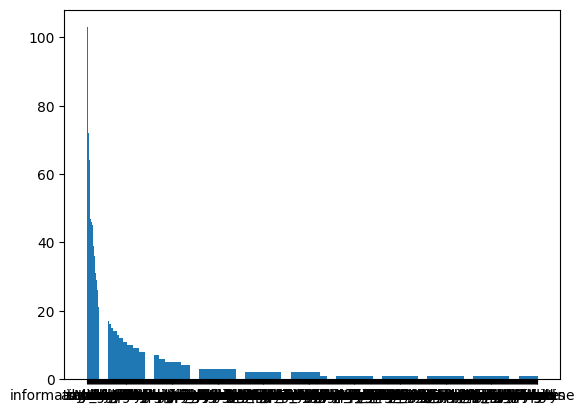

In [25]:
plt.bar(range(len(sortedTokenEp1)), sortedOccurencesEp1)
plt.xticks(range(len(sortedTokenEp1)), sortedTokenEp1)

Episode 1000

([<matplotlib.axis.XTick at 0x2cc667f10>,
 [Text(0, 0, 'iodine'),
  Text(1, 0, 'you'),
  Text(2, 0, 'angstrom'),
  Text(3, 0, 'the'),
  Text(4, 0, 'second'),
  Text(5, 0, 'to'),
  Text(6, 0, 'be'),
  Text(7, 0, 'information_technology'),
  Text(8, 0, 'that'),
  Text(9, 0, 'thymine'),
  Text(10, 0, 'and'),
  Text(11, 0, 'Maine'),
  Text(12, 0, 'inch'),
  Text(13, 0, 'of'),
  Text(14, 0, 'know'),
  Text(15, 0, 'what'),
  Text(16, 0, 'this'),
  Text(17, 0, 'meter'),
  Text(18, 0, 'my'),
  Text(19, 0, 'rich_person'),
  Text(20, 0, 'for'),
  Text(21, 0, 'about'),
  Text(22, 0, 'your'),
  Text(23, 0, 'not'),
  Text(24, 0, 'on'),
  Text(25, 0, 'just'),
  Text(26, 0, 'jimmy'),
  Text(27, 0, 'merely'),
  Text(28, 0, 'get'),
  Text(29, 0, 'beryllium'),
  Text(30, 0, 'sol'),
  Text(31, 0, 'Clark'),
  Text(32, 0, 'rhenium'),
  Text(33, 0, 'Don'),
  Text(34, 0, 'with'),
  Text(35, 0, 'do'),
  Text(36, 0, 'well'),
  Text(37, 0, 'all'),
  Text(38, 0, 'bash'),
  Text(39, 0, 'out'),
  Text(40, 0, 'like

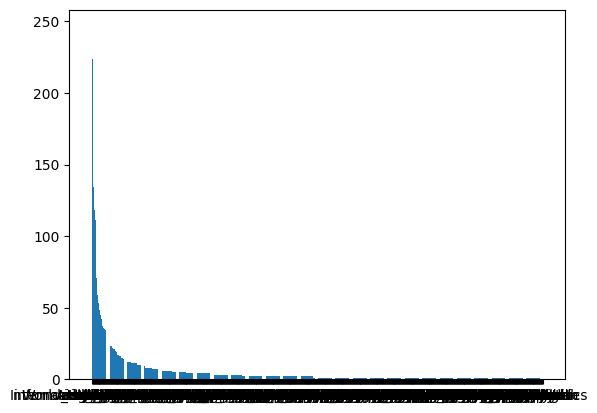

In [19]:
plt.bar(range(len(sortedTokenEp1000)), sortedOccurencesEp1000)
plt.xticks(range(len(sortedTokenEp1000)), sortedTokenEp1000)

([<matplotlib.axis.XTick at 0x2ce639990>,
 [Text(0, 0, 'you'),
  Text(1, 0, 'the'),
  Text(2, 0, 'iodine'),
  Text(3, 0, 'second'),
  Text(4, 0, 'be'),
  Text(5, 0, 'angstrom'),
  Text(6, 0, 'information_technology'),
  Text(7, 0, 'to'),
  Text(8, 0, 'helium'),
  Text(9, 0, 'that'),
  Text(10, 0, 'and'),
  Text(11, 0, 'thymine'),
  Text(12, 0, 'what'),
  Text(13, 0, 'this'),
  Text(14, 0, 'inch'),
  Text(15, 0, 'can'),
  Text(16, 0, 'of'),
  Text(17, 0, 'we'),
  Text(18, 0, 'know'),
  Text(19, 0, 'for'),
  Text(20, 0, 'merely'),
  Text(21, 0, 'just'),
  Text(22, 0, 'on'),
  Text(23, 0, 'no'),
  Text(24, 0, 'Maine'),
  Text(25, 0, 'not'),
  Text(26, 0, 'if'),
  Text(27, 0, 'sol'),
  Text(28, 0, 'go'),
  Text(29, 0, 'think'),
  Text(30, 0, 'his'),
  Text(31, 0, 'meter'),
  Text(32, 0, 'like'),
  Text(33, 0, 'there'),
  Text(34, 0, 'do'),
  Text(35, 0, 'rich_person'),
  Text(36, 0, 'Oklahoma'),
  Text(37, 0, 'my'),
  Text(38, 0, 'with'),
  Text(39, 0, 'one'),
  Text(40, 0, 'Don'),
  Text(

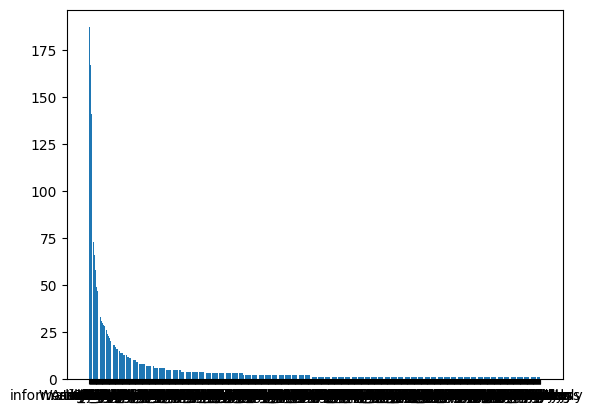

In [20]:
plt.bar(range(len(sortedTokenEp2000)), sortedOccurencesEp2000)
plt.xticks(range(len(sortedTokenEp2000)), sortedTokenEp2000)